In [121]:
import numpy as np
import matplotlib.pyplot as plt

In [122]:
# Initialize weights
rng = np.random.default_rng(42)

w0 = rng.uniform(-1/4, 1/4)
w1 = rng.uniform(-1, 1)
w2 = rng.uniform(-1, 1)

w = np.array([w0, w1, w2])

w

array([ 0.13697802, -0.12224312,  0.71719584])

In [123]:
num_points = 100
S = rng.uniform(-1, 1, (num_points, 2))

X_aug = np.hstack([np.ones((num_points,1)), S])

scores = X_aug.dot(w)
y = np.where(scores >= 0, 1, -1)

S1 = S[y == 1]
S0 = S[y == -1]

print("S1 size:", len(S1), "S0 size:", len(S0))

S1 size: 54 S0 size: 46


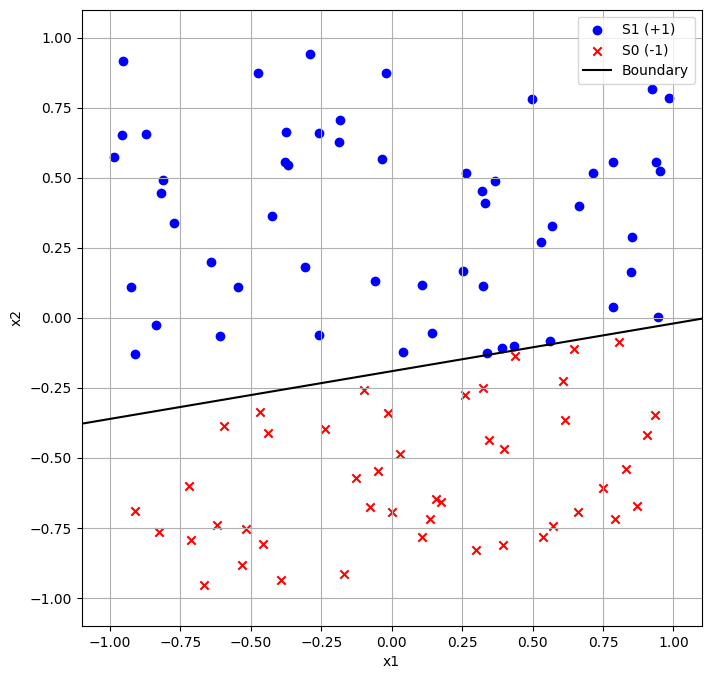

In [124]:
plt.figure(figsize=(8, 8))
plt.scatter(S1[:,0], S1[:,1], c='b', marker='o', label='S1 (+1)')
plt.scatter(S0[:,0], S0[:,1], c='r', marker='x', label='S0 (-1)')

xs = np.linspace(-1.1, 1.1, 200)
ys = -(w0 + w1*xs) / w2

plt.plot(xs, ys, 'k-', label='Boundary')

plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [125]:
def perceptron_train(X_aug, y, w_init, eta, max_epochs=1000):
    w = w_init.copy().astype(float)
    miscls_history = []
    for epoch in range(max_epochs):
        preds = np.sign(X_aug.dot(w))
        preds[preds==0] = 1
        miscls = np.sum(preds != y)
        miscls_history.append(miscls)
        if miscls == 0:
            break
        for i in range(len(X_aug)):
            xi, yi = X_aug[i], y[i]
            pred_i = 1 if xi.dot(w) >= 0 else -1
            if pred_i != yi:
                w = w + eta * yi * xi
    return w, miscls_history

w_prime = rng.uniform(-1, 1, size=3)
print("Initial random weights w':", w_prime)

# η = 1
final_w_eta1, miscls_eta1 = perceptron_train(X_aug, y, w_prime, eta=1)
print("Final weights (eta=1):", final_w_eta1)
print("Misclassifications per epoch:", [int(x) for x in miscls_eta1])


Initial random weights w': [-0.71220499 -0.97212742 -0.54068794]
Final weights (eta=1): [ 1.28779501 -1.2710318   5.77886983]
Misclassifications per epoch: [62, 5, 9, 7, 3, 3, 3, 0]


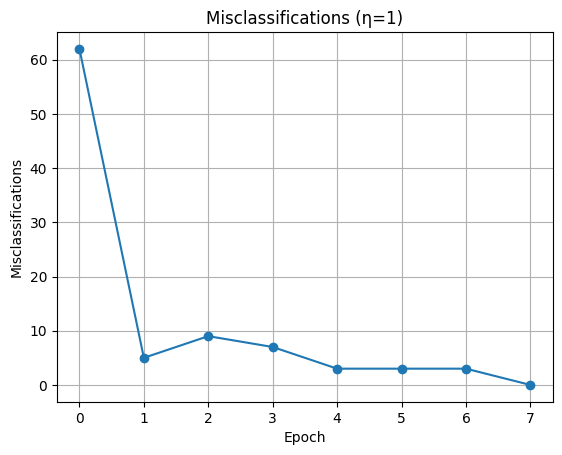

In [126]:
plt.figure()
plt.plot(range(len(miscls_eta1)), miscls_eta1, marker='o')
plt.xlabel("Epoch")
plt.ylabel("Misclassifications")
plt.title("Misclassifications (η=1)")
plt.grid(True)
plt.show()

Final weights (eta=10): [ 9.28779501 -7.14684986 47.15517681]
Misclassifications per epoch: [62, 10, 8, 3, 0]
Final weights (eta=0.1): [ 0.08779501 -0.06360778  0.51495825]
Misclassifications per epoch: [62, 10, 3, 3, 0]


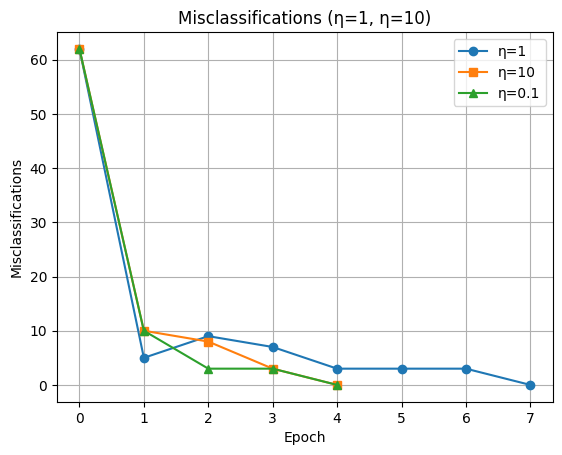

In [127]:
# eta=10
final_w_eta10, miscls_eta10 = perceptron_train(X_aug, y, w_prime, eta=10)
print("Final weights (eta=10):", final_w_eta10)
print("Misclassifications per epoch:", [int(x) for x in miscls_eta10])

# eta=0.1
final_w_eta01, miscls_eta01 = perceptron_train(X_aug, y, w_prime, eta=0.1)
print("Final weights (eta=0.1):", final_w_eta01)
print("Misclassifications per epoch:", [int(x) for x in miscls_eta01])

# Plotting
plt.figure()
plt.plot(range(len(miscls_eta1)), miscls_eta1, marker='o', label="η=1")
plt.plot(range(len(miscls_eta10)), miscls_eta10, marker='s', label="η=10")
plt.plot(range(len(miscls_eta01)), miscls_eta01, marker='^', label="η=0.1")
plt.xlabel("Epoch")
plt.ylabel("Misclassifications")
plt.title("Misclassifications (η=1, η=10)")
plt.legend()
plt.grid(True)
plt.show()


n=1000, eta=1 epochs: 142
n=1000, eta=10 epochs: 19
n=1000, eta=0.1 epochs: 41


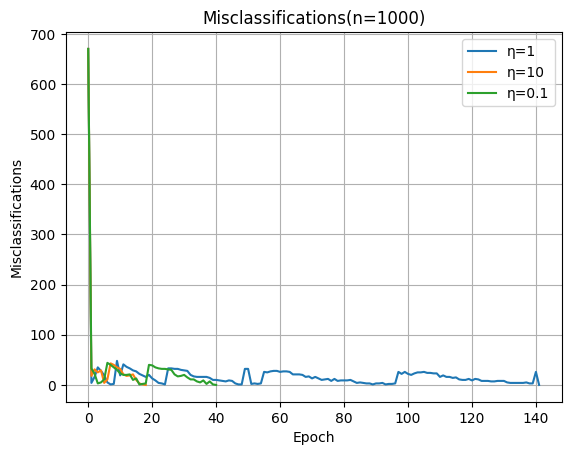

In [128]:
n2 = 1000
X2 = rng.uniform(-1, 1, size=(n2, 2))
X2_aug = np.hstack([np.ones((n2,1)), X2])
scores2 = X2_aug.dot(w)
y2 = np.where(scores2 >= 0, 1, -1)

final_w_eta1_n2, miscls_eta1_n2 = perceptron_train(X2_aug, y2, w_prime, eta=1)
final_w_eta10_n2, miscls_eta10_n2 = perceptron_train(X2_aug, y2, w_prime, eta=10)
final_w_eta01_n2, miscls_eta01_n2 = perceptron_train(X2_aug, y2, w_prime, eta=0.1)

print("n=1000, eta=1 epochs:", len(miscls_eta1_n2))
print("n=1000, eta=10 epochs:", len(miscls_eta10_n2))
print("n=1000, eta=0.1 epochs:", len(miscls_eta01_n2))

# Plotting
plt.figure()
plt.plot(range(len(miscls_eta1_n2)), miscls_eta1_n2, label="η=1")
plt.plot(range(len(miscls_eta10_n2)), miscls_eta10_n2, label="η=10")
plt.plot(range(len(miscls_eta01_n2)), miscls_eta01_n2, label="η=0.1")
plt.xlabel("Epoch")
plt.ylabel("Misclassifications")
plt.title("Misclassifications(n=1000)")
plt.legend()
plt.grid(True)
plt.show()
